In [17]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

Given a functional
$$J[y] = \int_a^b L(x,y(x),y'(x))dx,$$
we have determined that if $\bar y$ is a minimum of $J$, then $\bar y$ satisfies the Euler Lagrange (EL) equation. We also found that there are boundary conditions that $y_0$ must satsify. For problems of interest, we may not be able to solve the EL equation analytically. If this is the case, we may seek a numerical approximation of the solution. In this notebook, we describe how to numerically solve boundary value problems in Python.

We begin by numerically solving the BVP
$$ y''(x) = -y(x)$$

subject to the boundary conditions $y(0) = 1$ and $y(\pi/2) = 2$. We write the ODE as a first order system,

$$\begin{split}y_0'&= y_1\\y_1'&=-y_0.\end{split}$$

We define a function for this first order system below.

In [18]:
def ode_fun(x, y):
    # y'' = -y
    return np.vstack((y[1], -y[0]))

Next, we write a function to give the boundary conditions. The input for this functon is ya and yb, where ya is the vector $(y_0(a),y_1(a))^T$ and yb is the vector $(y_0(b),y_1(b))^T$. That is, ya and yb are the values of our numerical approximation of the solution at $x = a$ and $x = b$ respectively where $x\in[a,b]$. The function we write to provide the boundary conditions returns a vector that the solver will try to make be zero. So, if we want $y_0(a) = A$, then the fisrt component of the ouput vector should be $y_0(a)-A$. We now provide the boundary condition function. Recall that our boundary conditions are $y_0(0) = 1$ and $y_0(\pi/2) = 2$.

In [19]:
def bc(ya, yb):
    # y(0) = 1, y(pi/2) = 2
    return np.array([ya[0]-1, yb[0]-2])

We now call the solver to obtain our numerical approximation of the solution. In the block of code below, x is the grid on which we provide an initial guess to the solution, and y0 is the guess we provide on that grid. Since our ODE is two-dimensional, our initial guess y0 has 2 rows and the same number of columns as the length of x. Finally we call solve_bvp from scipy.integrate. The input is the ode function, the boundary condition function, the initial grid, and the solution guess on the initial grid.

In [22]:
x = np.linspace(0, np.pi/2, 5)
y0 = np.zeros((2, x.size))

res = solve_bvp(ode_fun, bc, x, y0)

The solution to this BVP is $y(x) = \cos(x)+2\sin(x)$. In the code below, we compare the true solution against the numerical approximation.

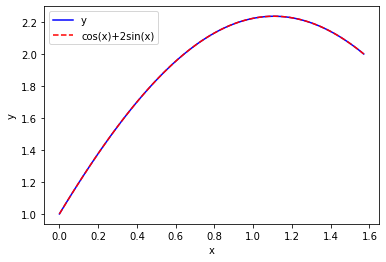

In [23]:
x_plot = np.linspace(0, np.pi/2, 100)
y_plot = res.sol(x_plot)[0]

plt.plot(x_plot, y_plot, '-b', label='y')
plt.plot(x_plot, np.cos(x_plot)+2*np.sin(x_plot),'--r',label='cos(x)+2sin(x)')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<hr>

Last semester we did parameter reduction in ODEs. That is, we reduced the number of parameters that showed up in our system. What might happen in our solver if we have two parameters that can be reduced? As an example, consider the BVP 
$$\alpha y''(x) = \beta y(x)$$
with free parameters $\alpha$ and $\beta$, and boundary conditions $y(0) = 0$, $y'(0) = 1$, and $y(\pi) = 0$. Note that the solution is $y(x) = \sin(x)$ and that any choice of $\alpha$ and $\beta$ satisfying $\beta/\alpha = -1$ would admit this solution. Without going into the details, we note that in approximating a solution to the BVP, we are using Newton's method to solve for the zeros of a large nonlinear system. However, the zeros of this system are not isolated because any $\alpha$ and $\beta$ correspond to a zero of the system as long as $\alpha = -\beta$.  

Upon doing parameter reduction, we obtain the BVP 
$$y''(x) = \gamma y(x),$$

where $\gamma = \beta/\alpha$, subject to the boundary conditions $y(0) = 0$, $y'(0) = 1$, and $y(\pi) = 0$. 

<hr>
Next we consider the BVP
$$
\begin{split}
y_0' &= y_1\\
y_1' &= -\alpha y_0
\end{split}
$$

with boundary conditions $y_0(0) = 1$ and $y_1(0) = 0$, and $y_0(1) = 0$. Note that there are three boundary conditions, but the ODE is only two-dimensional. Because we have a free parameter, $\alpha$, we need to provide an additional boundary condition in order to choose a solution from the family of solutions that satisfy the ODE. Note that we do not expect the BVP to have a solution for every value of $\alpha$. In the process of solving the BVP, we will obtain an approximation of $\alpha$ for which the ODE has solution satisfying the three boundary conditions. 



We now return to the BVP
$$
\begin{split}
y_0' &= y_1\\
y_1' &= -\gamma y_0
\end{split}
$$

with boundary conditions $y_0(0) = 1$ and $y_1(0) = 0$, and $y_0(1) = 0$. We solve this with the code below. In ode_fun2, the input includes x, the independent variable, y, the dependent variable that is a function of x, and an array p of free parameters. The output is the ODE.

In [24]:
def ode_fun2(x, y, p):
    alpha = p[0] # the free parameter
    
    # y_0' = y_1, y_1' = -alpha*y_0
    return np.vstack((y[1], -alpha * y[0]))

The boundary condition function must also include a third input for the array of free parameters.

In [25]:
def bc2(ya, yb, p):
    alpha = p[0] # free parameter
    
    # y_0(0) = 1, y_1(0) = 0, y_0(1) = 0
    return np.array([ya[0]-1, ya[1], yb[0]])

Now we solve the BVP. Note that the code is very similar to what we used previously, but now we must include an initial guess for the free parameter $\alpha$, which is written as p = [200]. 

In [28]:
x = np.linspace(0, 1, 5)
y = np.ones((2, x.size))
sol2 = solve_bvp(ode_fun2, bc2, x, y, p=[2])

Now we plot the solution.

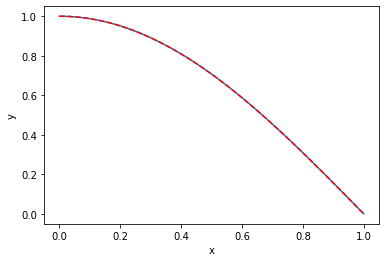

alpha = 2.4675472580944726


In [29]:
x_plot = np.linspace(0, 1, 100)
y_plot = sol2.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.plot(x_plot,np.cos(np.pi*x_plot/2),'--r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print('alpha = '+str(sol2.p[0]))

<hr>
<h2>Try this!</h2>

Now provide a guess for the free parameter by setting p = [200] as input. Why did you get the solution that you got? 

<hr>
<h1>Homework Assignment:</h1>

Use solve_bvp to approximate the solution to the following BVP.

$$
\begin{split}
y_0'&= \alpha y_1\\
y_1'&= y_0^2+y_1^2+y_0/2-1
\end{split}
$$
subject to the boudnary conditions $y_0(0) = 1$, $y_1(0) = 0$, and $y_0(\pi) = 0$. Specifically, find a solution that is decreasing and concave down.

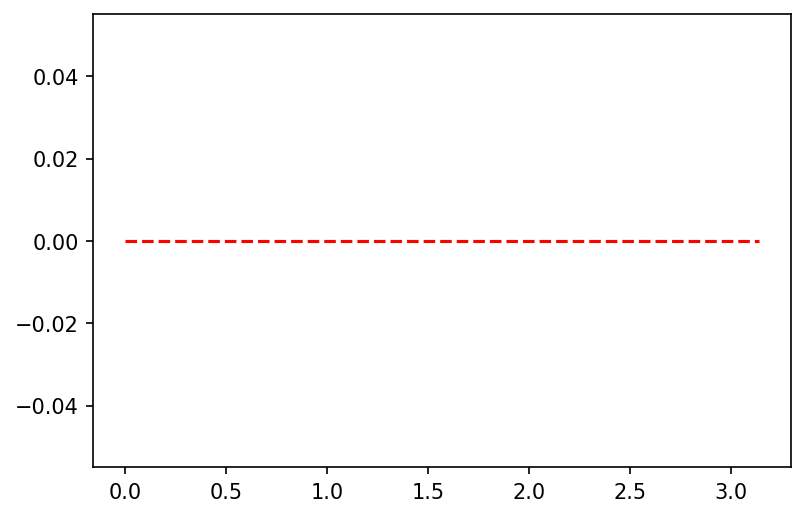

In [32]:
def ode_fun3(t, y, p):
    '''defines ode system up above
    '''
    α=p[0]
    return np.array([α*y[1], y[0]**2 + y[1]**2 + y[0]/2 - 1])

def bc3(ya, yb, p):
    '''defines the boundary condition
    '''
    α = p[0]
    return np.array([ya[0]-1, ya[1], yb[0]])

#define soluttion variables
x0 = np.linspace(0, np.pi, 10)
y0 = np.zeros((2, x.size))
#solve
sol3 = solve_bvp(ode_fun3, bc3, x, y0, p=[-20])
#plot
x_plot = np.linspace(0, np.pi, 1000)
y_plot = sol3.sol(x_plot)[0]
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(x_plot, y_plot, 'r--', label='Numerical Sol')
plt.show()